In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math
%matplotlib inline

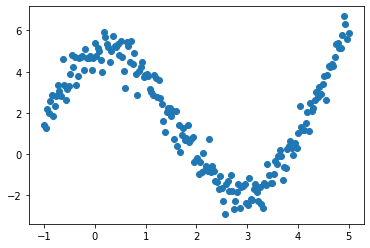

In [2]:
x = np.linspace(-1,5,200).reshape(-1,1)
y = 5*np.cos(x) + x + 0.5*np.random.randn(len(x),1)
plt.scatter(x,y )
plt.show()

In [3]:
data = np.concatenate([x.reshape(-1,1), y.reshape(-1,1)],axis = 1 )

In [4]:
np.random.shuffle(data)

Trying LOWESS regression

In [5]:
def getW(x,query_point,tao):
    m = x.shape[0]
    w = np.eye(m)
    for i in range(m):
        w[i,i] = np.exp(-(x[i] - query_point)*((x[i] -  query_point).T)/(2*tao*tao))
    return w

In [6]:
x = data[:,0]
y = data[:,1]
one = np.ones((x.shape[0],1))
x_ = np.mat( np.concatenate([one,x.reshape(-1,1)],axis = 1) )
y_ = np.mat(y).reshape(-1,1)

In [7]:
getW(x_,np.mat([[1,0]]),1).shape

(200, 200)

In [8]:
def predict(x,y,query_point,tao):
    qx = np.mat([[1 , query_point]])
    w = np.mat(getW(x,qx,tao))
    # theta = inv(X'WX)*X'Wy
    theta = np.linalg.pinv(x.T*(w*x))*x.T*(w*y)
    return theta,qx*theta

In [9]:
predict(x_,y_,-1,1)[1]

matrix([[3.12095569]])

In [10]:
def plotpred(tao):
    xtest = np.linspace(-1,5,50)
    ytest = []
    for i in range(len(xtest)):
        pred = predict(x_,y_,xtest[i],tao)[1]
        ytest.append(pred)
    ytest = np.array(ytest)
    plt.scatter(x,y)
    plt.scatter(xtest,ytest.reshape(-1,),c = 'red')
    plt.show()
        

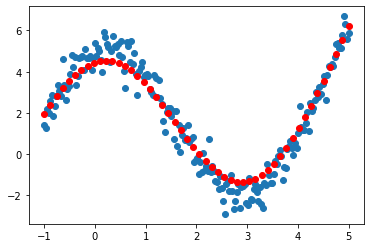

In [11]:
plotpred(0.5)